# Import thư viện

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Nạp và xử lý data

In [6]:
import pandas as pd
titanic=pd.read_csv("/Users/macbookpro/Documents/GitHub/Machine-Learning/data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Chọn các cột cần thiết
titanic = titanic[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Xử lý giá trị thiếu
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())
titanic.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [29]:
label_encoder = LabelEncoder()
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])  # male = 1, female = 0
titanic.head()

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


In [37]:
X = titanic[['Pclass', 'Sex', 'Age', 'Fare']].values
Y = titanic['Survived'].values
print(X)  #matrix
print(Y)

[[ 3.      1.     22.      7.25  ]
 [ 1.      0.     38.     71.2833]
 [ 3.      0.     26.      7.925 ]
 ...
 [ 3.      0.     28.     23.45  ]
 [ 1.      1.     26.     30.    ]
 [ 3.      1.     32.      7.75  ]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0

In [45]:
scaler = StandardScaler()
X[:, 2:] = scaler.fit_transform(X[:, 2:])
print(X)

[[ 3.          1.         -0.56573646 -0.50244517]
 [ 1.          0.          0.66386103  0.78684529]
 [ 3.          0.         -0.25833709 -0.48885426]
 ...
 [ 3.          0.         -0.1046374  -0.17626324]
 [ 1.          1.         -0.25833709 -0.04438104]
 [ 3.          1.          0.20276197 -0.49237783]]


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Xây dựng model KNN

## Tính khoảng cách Euclidean

In [53]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

## Model KNN

In [61]:
def knn_predict(X_train, Y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = []
        
        for i, train_point in enumerate(X_train):
            dist = euclidean_distance(test_point, train_point)
            distances.append((dist, Y_train[i]))
        
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = distances[:k]
        
        k_labels = [label for _, label in k_nearest_neighbors]
        
        predicted_label = Counter(k_labels).most_common(1)[0][0]
        predictions.append(predicted_label)
    return predictions

## Tìm k tối ưu

Best k:  8
Highest accuracy: 0.8379888268156425


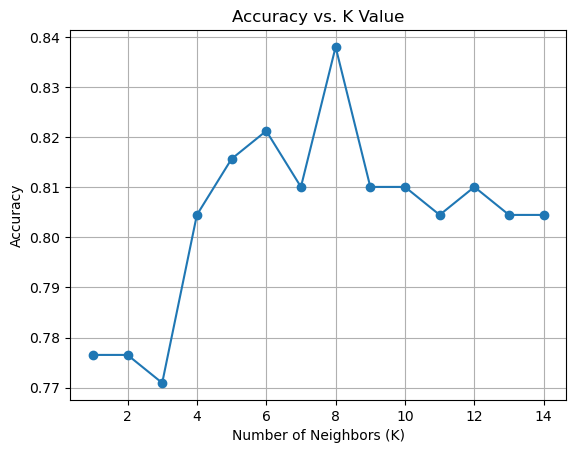

In [87]:
accuracy_list = []
k_values = range(1, 15)
best_k = None
highest_accuracy = 0
for k in k_values:
    Y_pred_k = knn_predict(X_train, Y_train, X_test, k)
    accuracy = np.mean(Y_pred_k == Y_test)
    accuracy_list.append(accuracy)
    
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_k = k
print("Best k: ",best_k)
print("Highest accuracy:", highest_accuracy)
plt.plot(k_values, accuracy_list, marker='o', linestyle='-')
plt.title("Accuracy vs. K Value")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

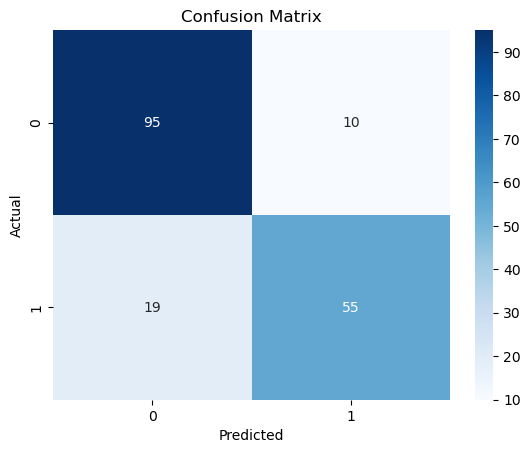

In [91]:
Y_pred = knn_predict(X_train, Y_train, X_test, best_k)
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()